In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

In [2]:
df = pd.read_csv('diamonds.csv')
df.drop(axis=1, inplace=True, columns='Unnamed: 0')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.isnull().values.any()

False

# EDA

In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<AxesSubplot:xlabel='carat', ylabel='price'>

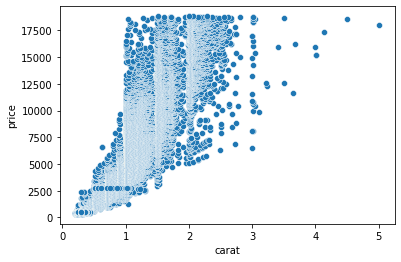

In [9]:
sns.scatterplot(x=df.carat, y=df.price)

<AxesSubplot:xlabel='carat', ylabel='Count'>

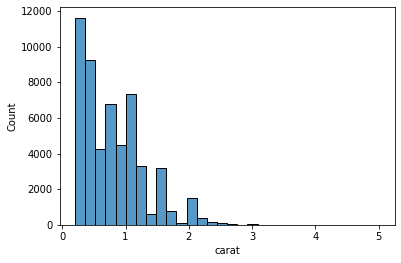

In [10]:
sns.histplot(x=df.carat, bins=30)

<AxesSubplot:xlabel='cut', ylabel='count'>

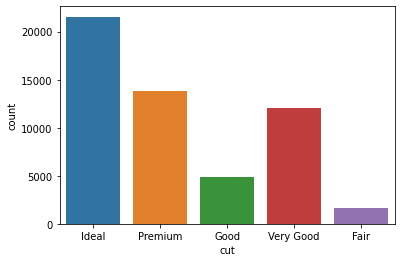

In [11]:
sns.countplot(x=df.cut)

<AxesSubplot:xlabel='cut', ylabel='price'>

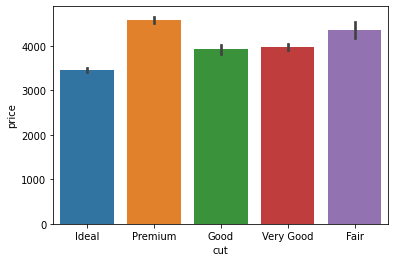

In [12]:
sns.barplot(x=df.cut, y=df.price)

<AxesSubplot:xlabel='color', ylabel='count'>

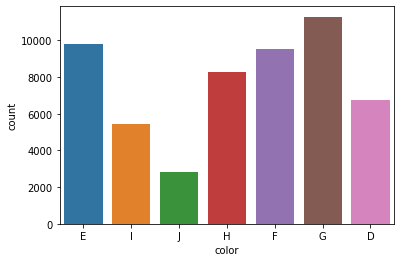

In [13]:
sns.countplot(x=df.color)

<AxesSubplot:xlabel='color', ylabel='price'>

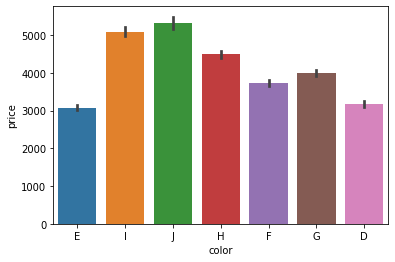

In [14]:
sns.barplot(x=df.color, y=df.price)

<AxesSubplot:xlabel='clarity', ylabel='count'>

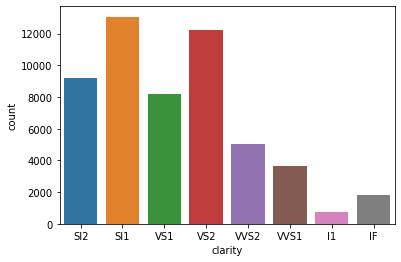

In [15]:
sns.countplot(x=df.clarity)

<AxesSubplot:xlabel='clarity', ylabel='price'>

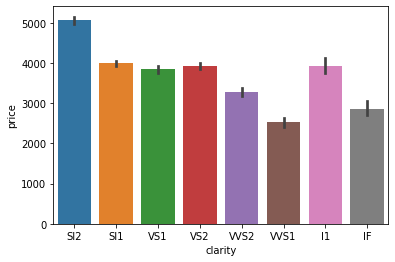

In [16]:
sns.barplot(x=df.clarity, y=df.price)

<AxesSubplot:xlabel='depth', ylabel='price'>

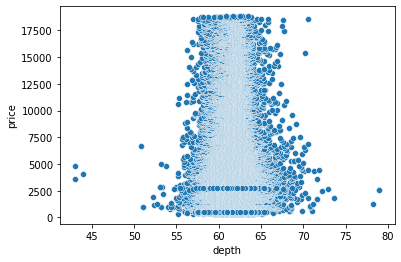

In [17]:
sns.scatterplot(x=df.depth, y=df.price)

<AxesSubplot:xlabel='depth', ylabel='Count'>

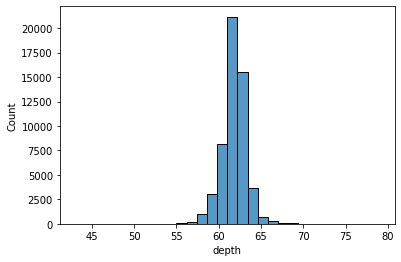

In [18]:
sns.histplot(x=df.depth, bins=30)

<AxesSubplot:xlabel='table', ylabel='price'>

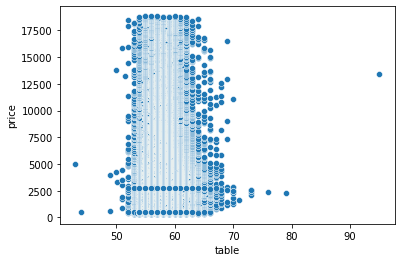

In [19]:
sns.scatterplot(x=df.table, y=df.price)

<AxesSubplot:xlabel='table', ylabel='Count'>

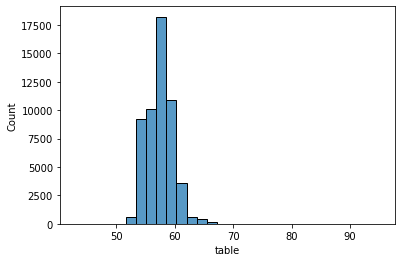

In [20]:
sns.histplot(x=df.table, bins=30)

<AxesSubplot:xlabel='x', ylabel='Count'>

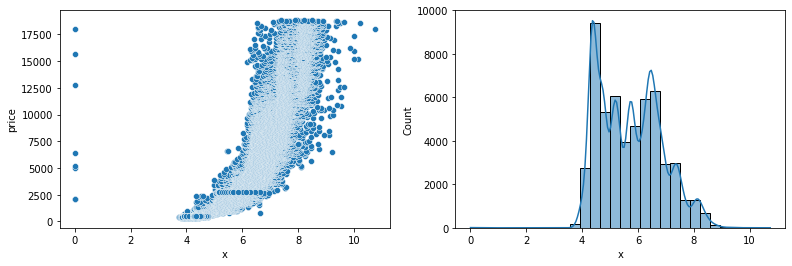

In [21]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.scatterplot(x=df.x, y=df.price)
plt.subplot(1,2,2)
sns.histplot(x=df.x, bins=30, kde=True)

<AxesSubplot:xlabel='y', ylabel='Count'>

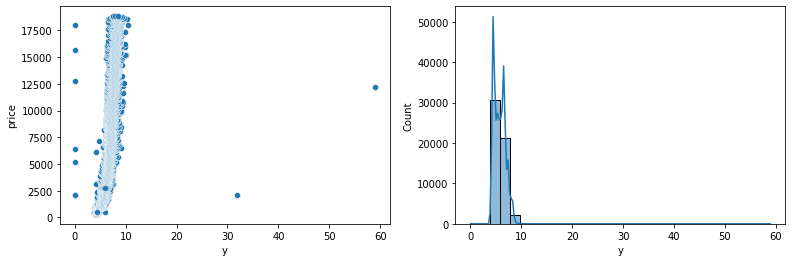

In [22]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.scatterplot(x=df.y, y=df.price)
plt.subplot(1,2,2)
sns.histplot(x=df.y, bins=30, kde=True)

<AxesSubplot:xlabel='z', ylabel='Count'>

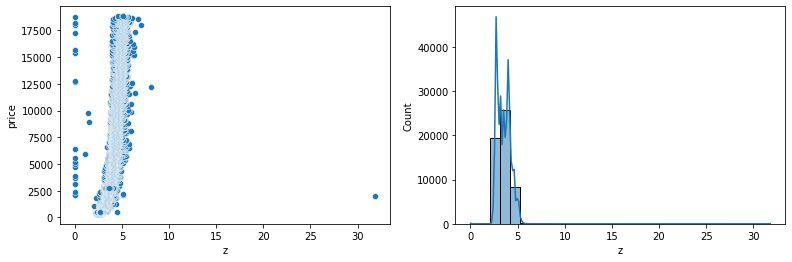

In [23]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.scatterplot(x=df.z, y=df.price)
plt.subplot(1,2,2)
sns.histplot(x=df.z, bins=30, kde=True)

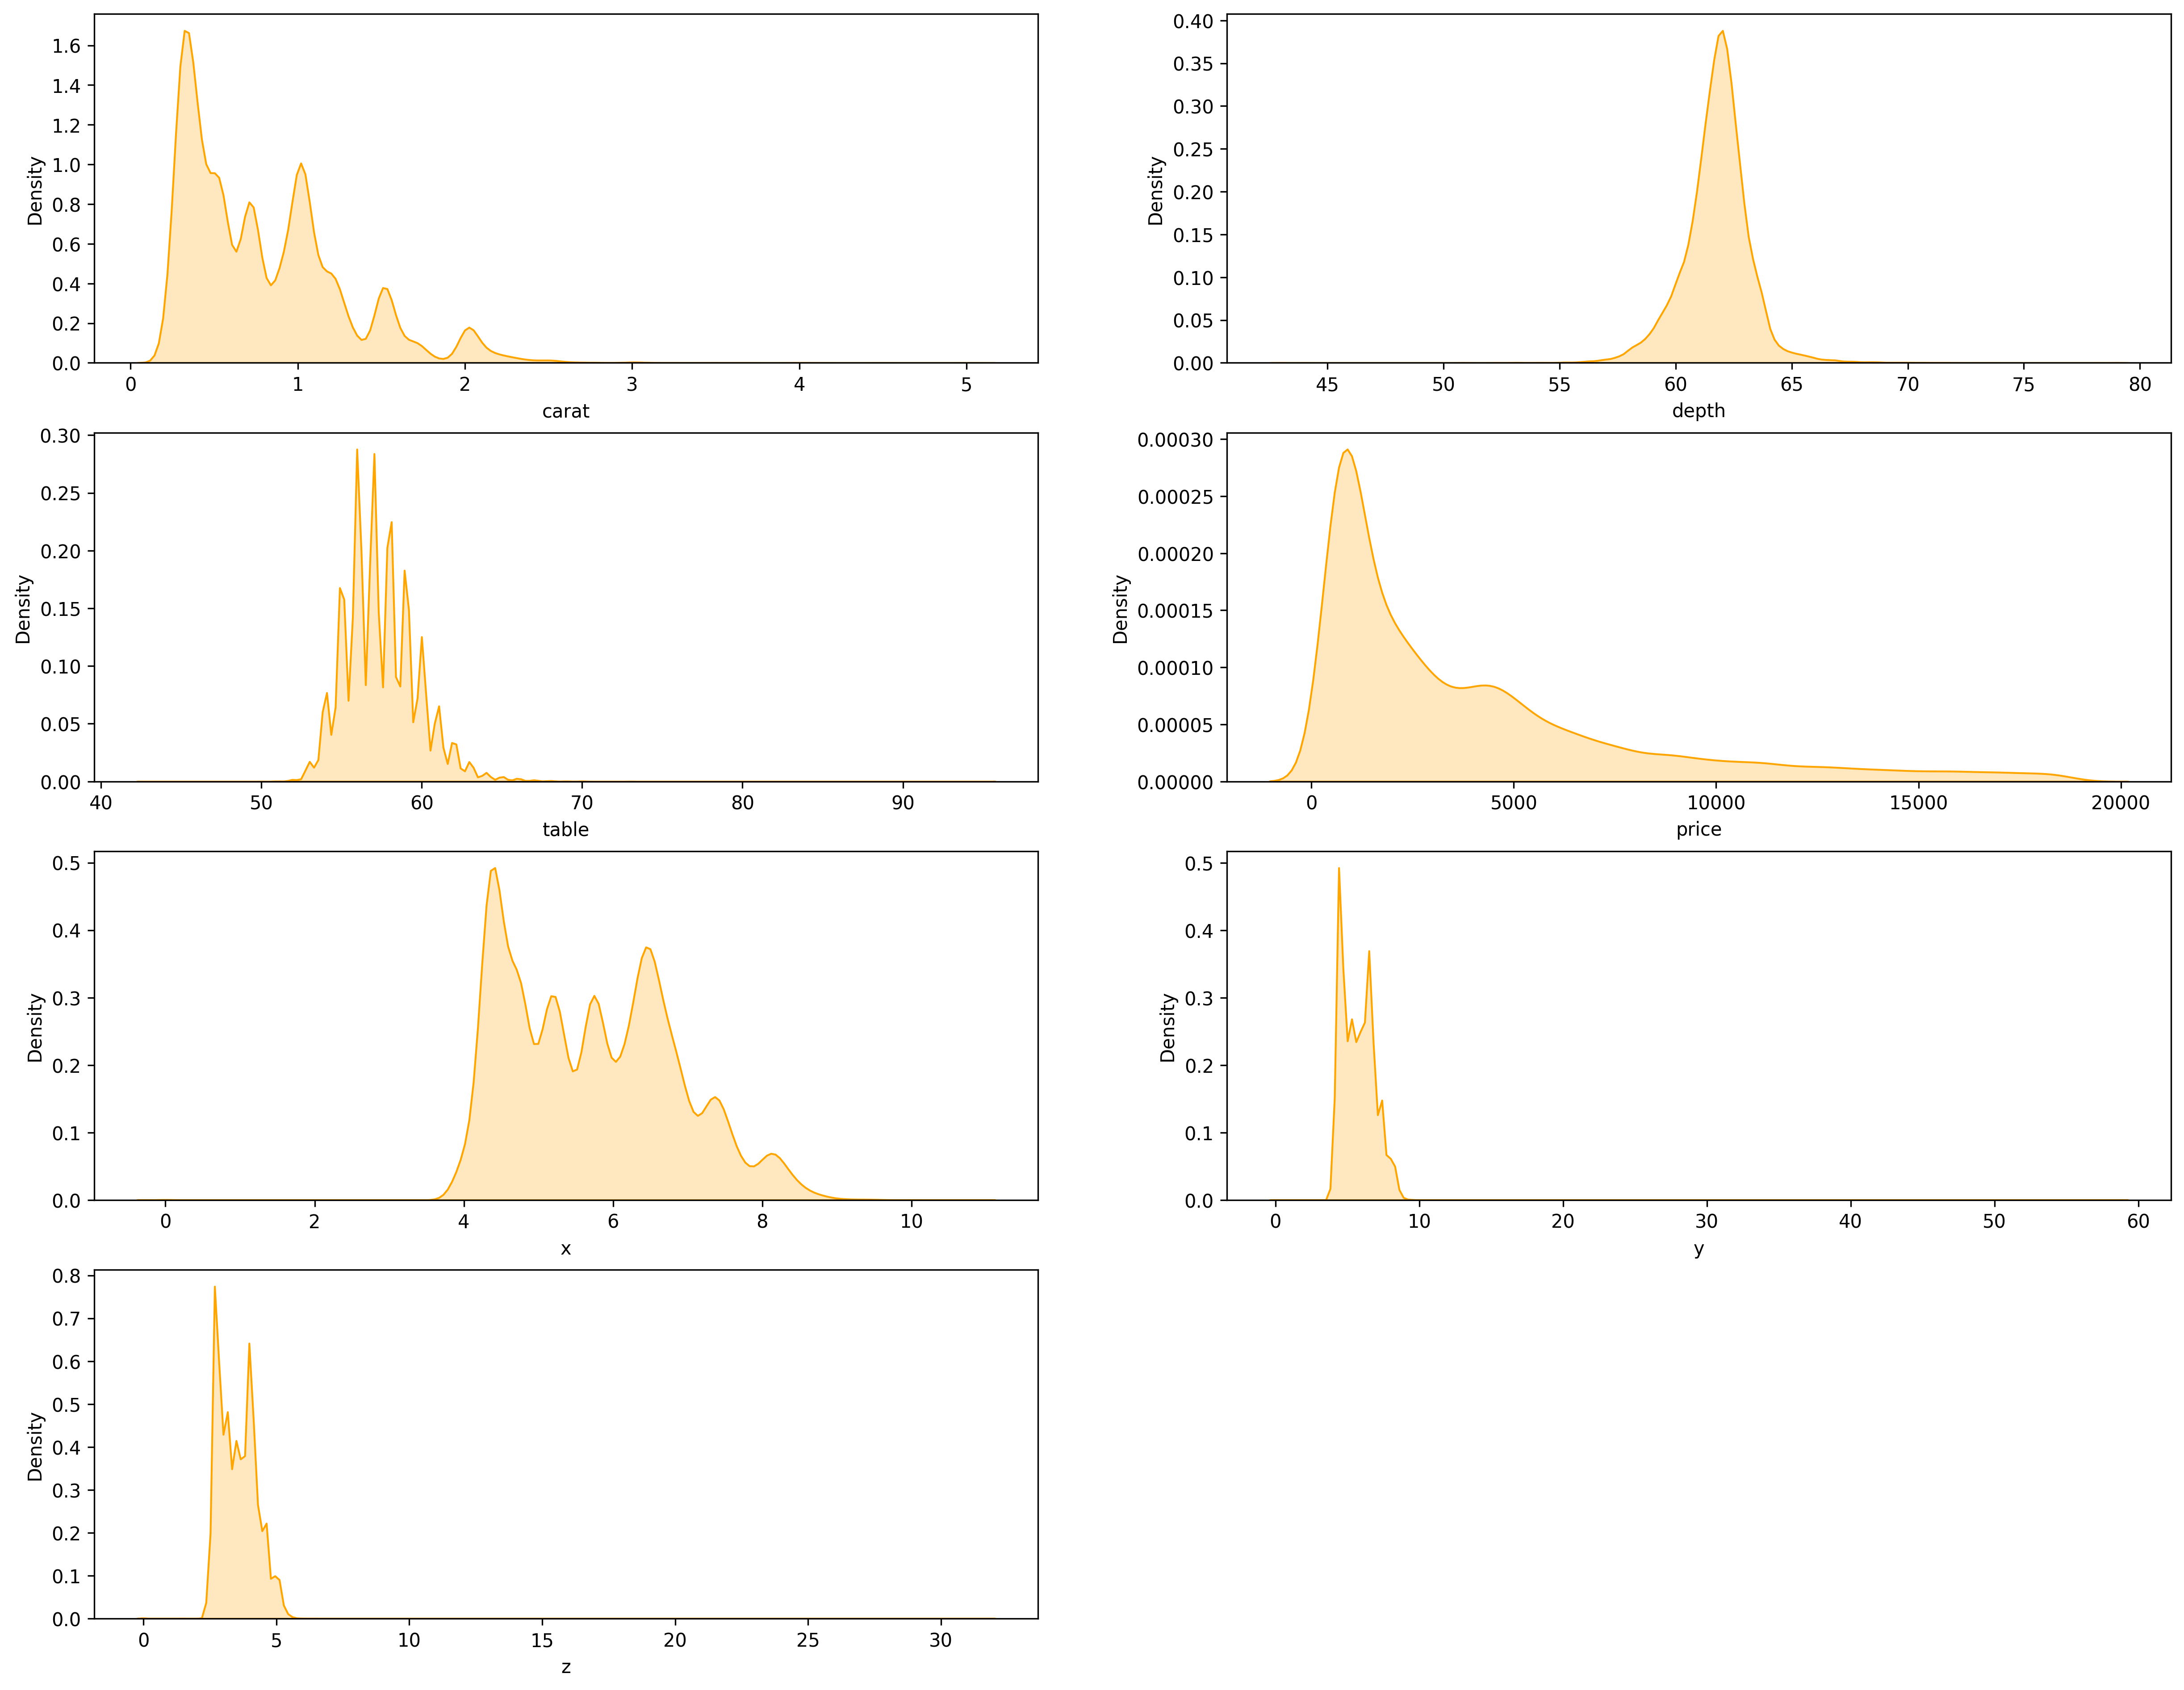

In [24]:
plt.figure(figsize=(20,20), dpi=300)
i=1
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.subplot(5,2,i)
    i+=1
    sns.kdeplot(x=df[col], shade=True, color='orange')

In [25]:
df.skew()

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

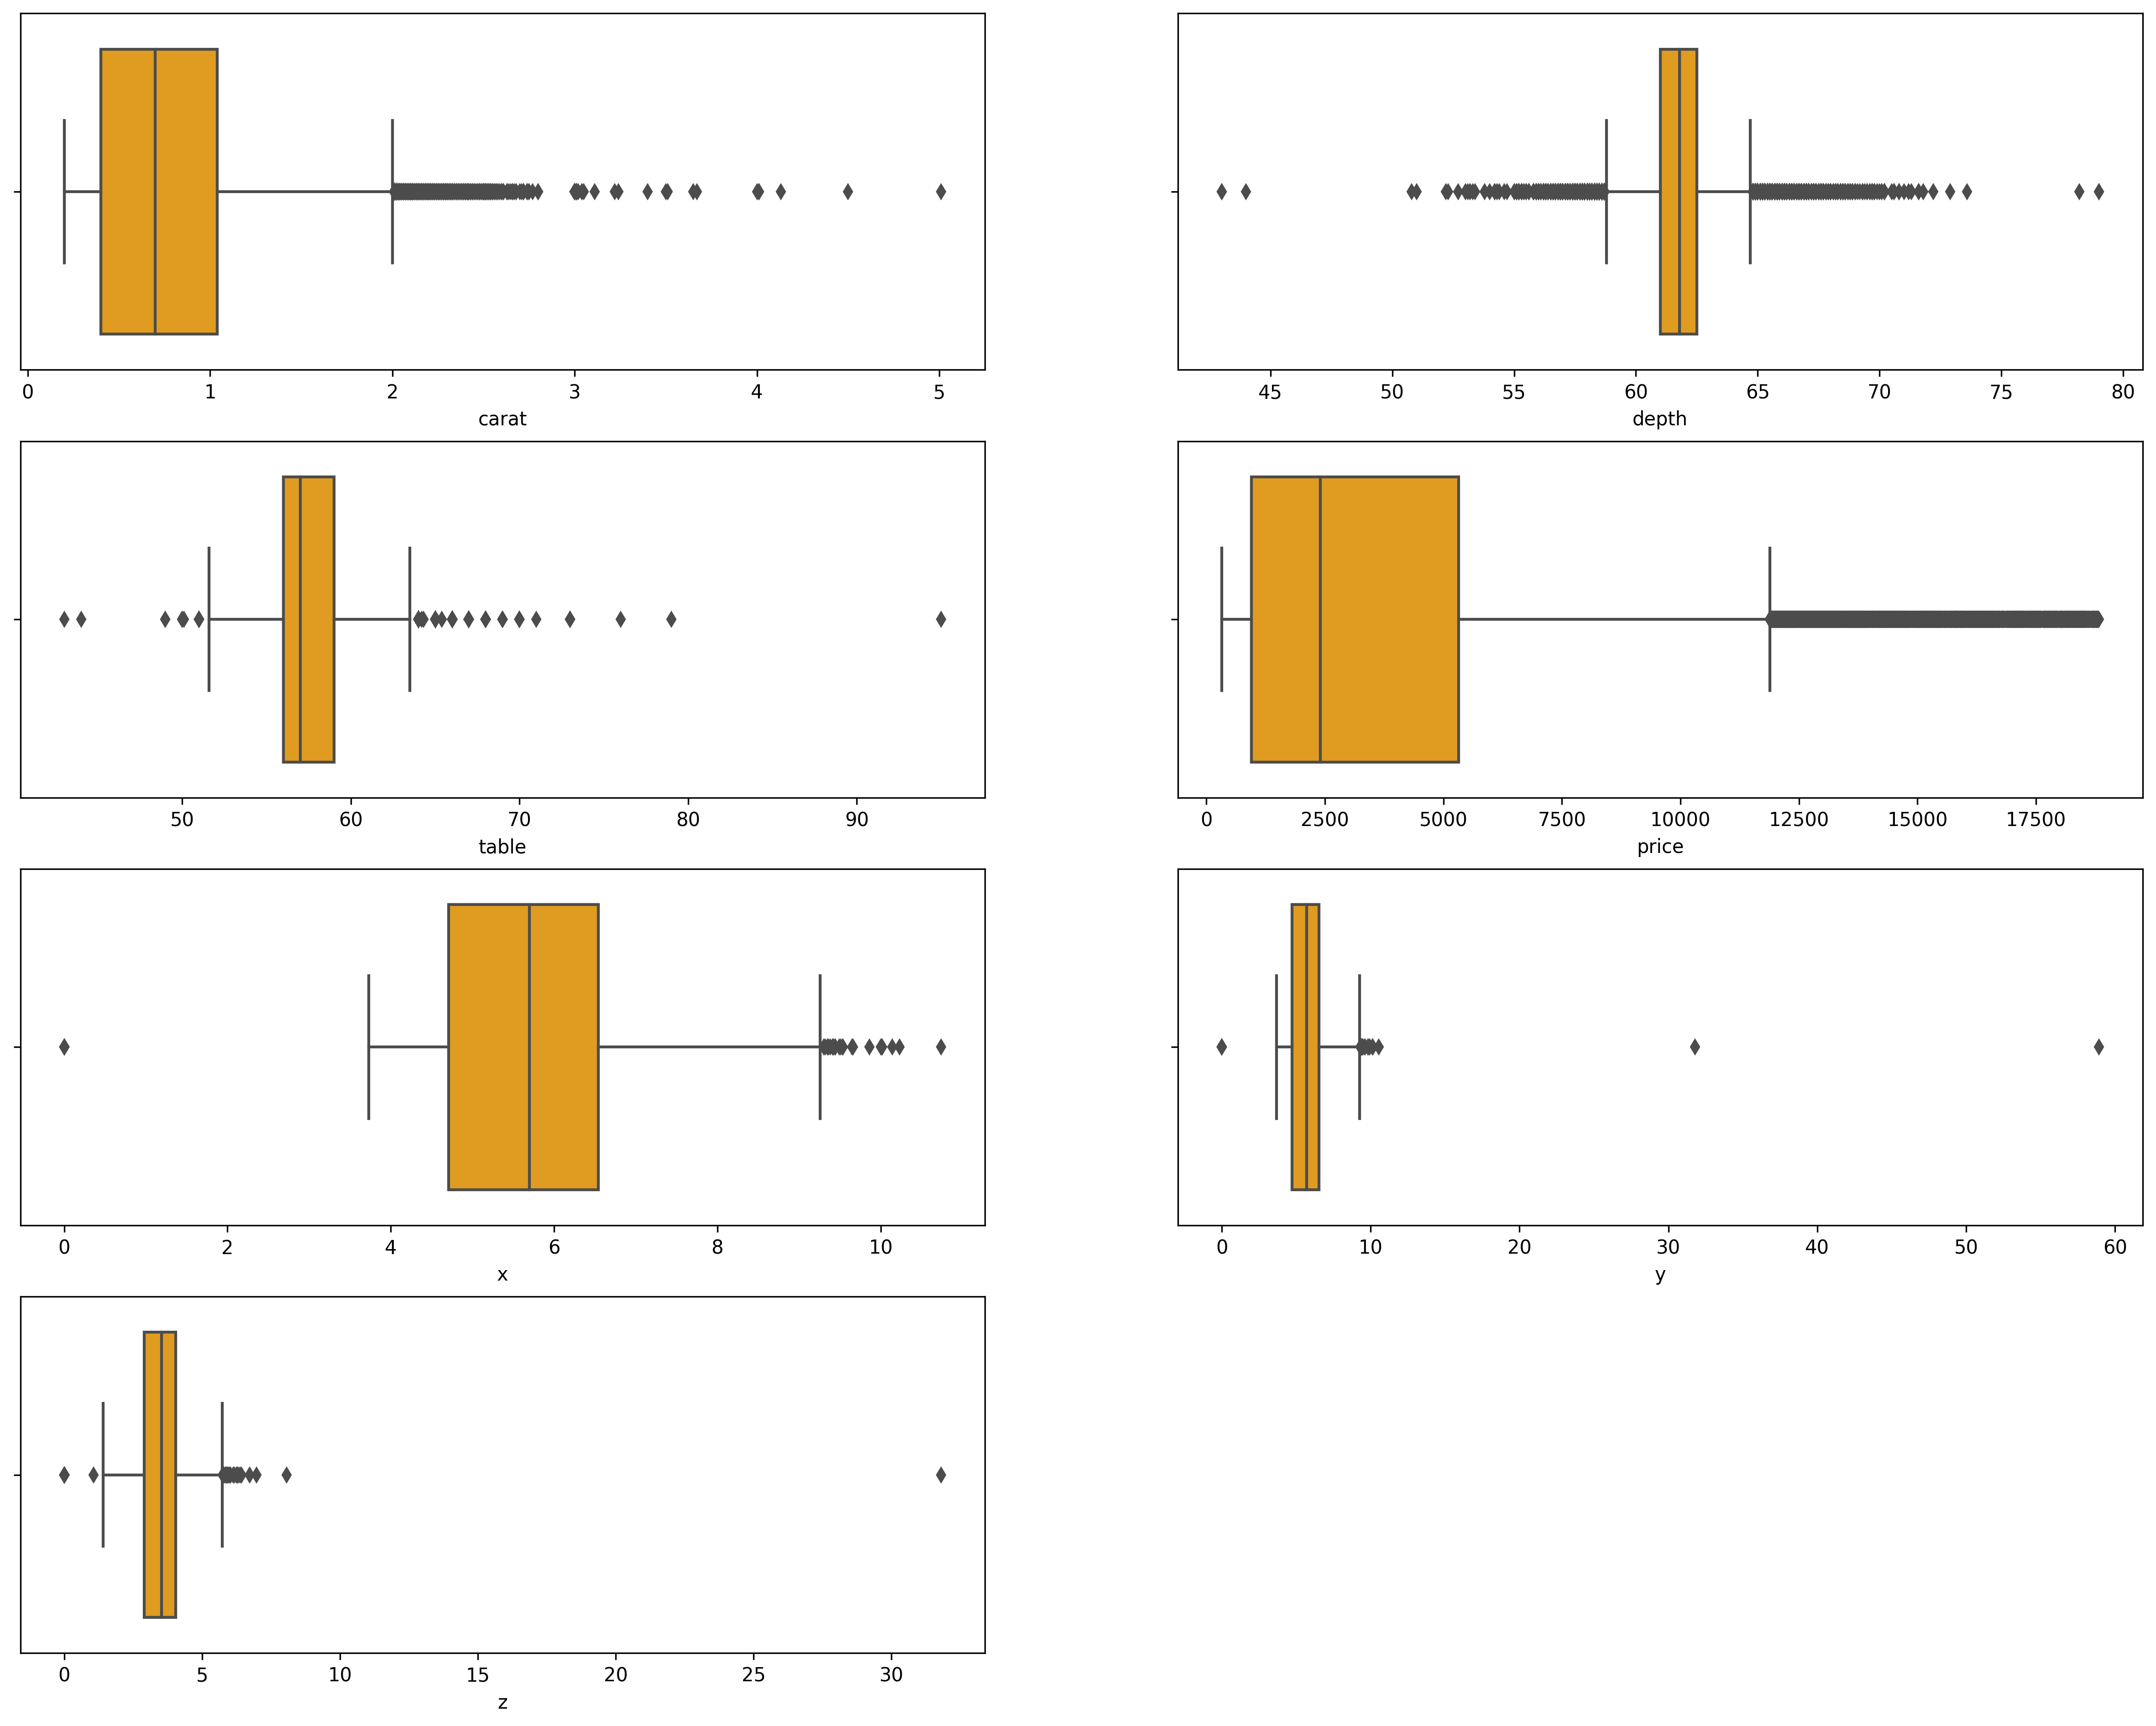

In [26]:
plt.figure(figsize=(20,20), dpi=300)
i=1
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.subplot(5,2,i)
    i+=1
    sns.boxplot(x=df[col], color='orange')

<AxesSubplot:>

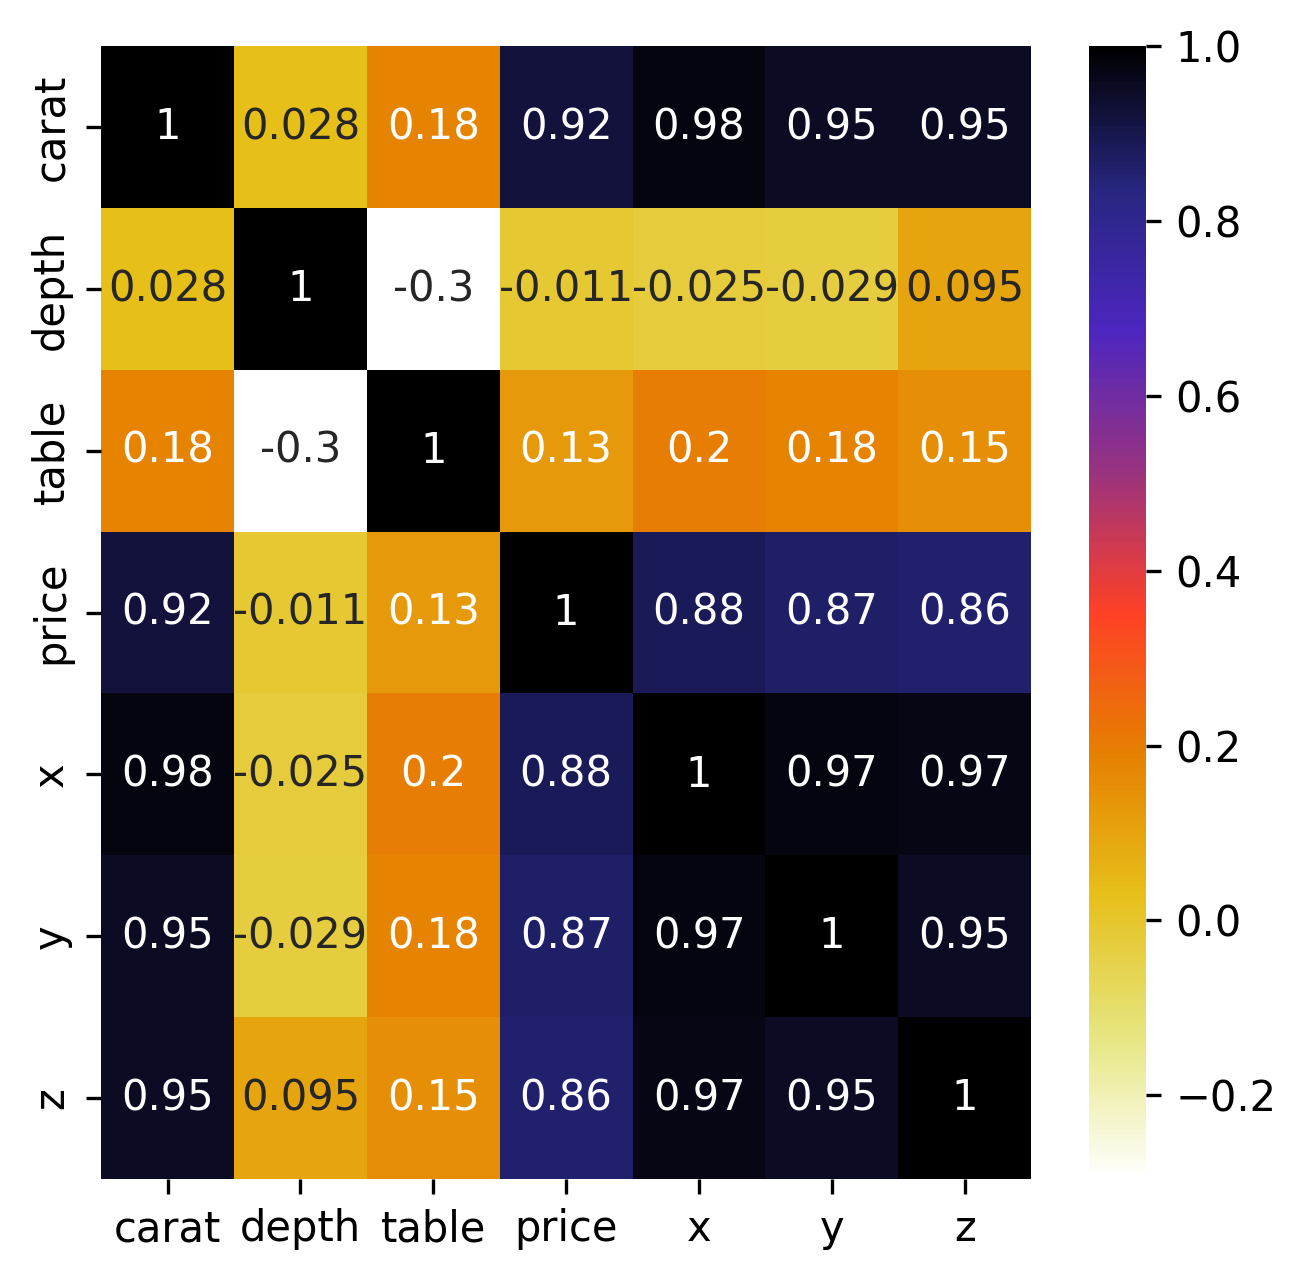

In [27]:
plt.figure(figsize=(5,5), dpi=300)
sns.heatmap(data=df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [28]:
df[['carat','x','y','z']].head()

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75


### WE can drop x,y,z because they are highly correlated.So in feature enginnering use K best to check which is more important and then think of removing it

# Feature Enginnering

#### BOX-COX Transformation

In [29]:
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    df[col], _ = stats.boxcox(df[col]+1)

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.182396,Ideal,E,SI2,416.357223,0.236713,4.793885,1.736710,1.595582,1.364145
1,0.169610,Premium,E,SI1,398.713831,0.236713,4.793885,1.722371,1.567413,1.320793
2,0.182396,Good,E,VS1,369.259447,0.236713,4.795951,1.760264,1.613272,1.320793
3,0.218091,Premium,I,VS2,425.809207,0.236713,4.810232,1.794822,1.643954,1.433652
4,0.229174,Good,J,SI2,435.337671,0.236713,4.812246,1.826278,1.666352,1.473830


In [31]:
df.skew()

carat    0.117887
depth    0.068120
table    0.000000
price    0.025726
x        0.004618
y       -0.000806
z        0.017730
dtype: float64

#### Handling Outliers

In [32]:
quantile1 , quantile3 = np.quantile(df['carat'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['carat'].median()

df.loc[df.carat<lower_bound, 'carat'] = median
df.loc[df.carat>upper_bound, 'carat'] = median

In [33]:
quantile1 , quantile3 = np.quantile(df['depth'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['depth'].median()

df.loc[df.depth<lower_bound, 'depth'] = median
df.loc[df.depth>upper_bound, 'depth'] = median

In [34]:
quantile1 , quantile3 = np.quantile(df['table'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['table'].median()

df.loc[df.table<lower_bound, 'table'] = median
df.loc[df.table>upper_bound, 'table'] = median

In [35]:
quantile1 , quantile3 = np.quantile(df['price'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['price'].median()

df.loc[df.price<lower_bound, 'price'] = median
df.loc[df.price>upper_bound, 'price'] = median

In [36]:
quantile1 , quantile3 = np.quantile(df['x'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['x'].median()

df.loc[df.x<lower_bound, 'x'] = median
df.loc[df.x>upper_bound, 'x'] = median

In [37]:
quantile1 , quantile3 = np.quantile(df['y'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['y'].median()

df.loc[df.y<lower_bound, 'y'] = median
df.loc[df.y>upper_bound, 'y'] = median

In [38]:
quantile1 , quantile3 = np.quantile(df['z'], [0.25,0.75])
IQR = quantile3 - quantile1
lower_bound = quantile1 - (1.5*IQR)
upper_bound = quantile3 + (1.5*IQR)
median = df['z'].median()

df.loc[df.z<lower_bound, 'z'] = median
df.loc[df.z>upper_bound, 'z'] = median

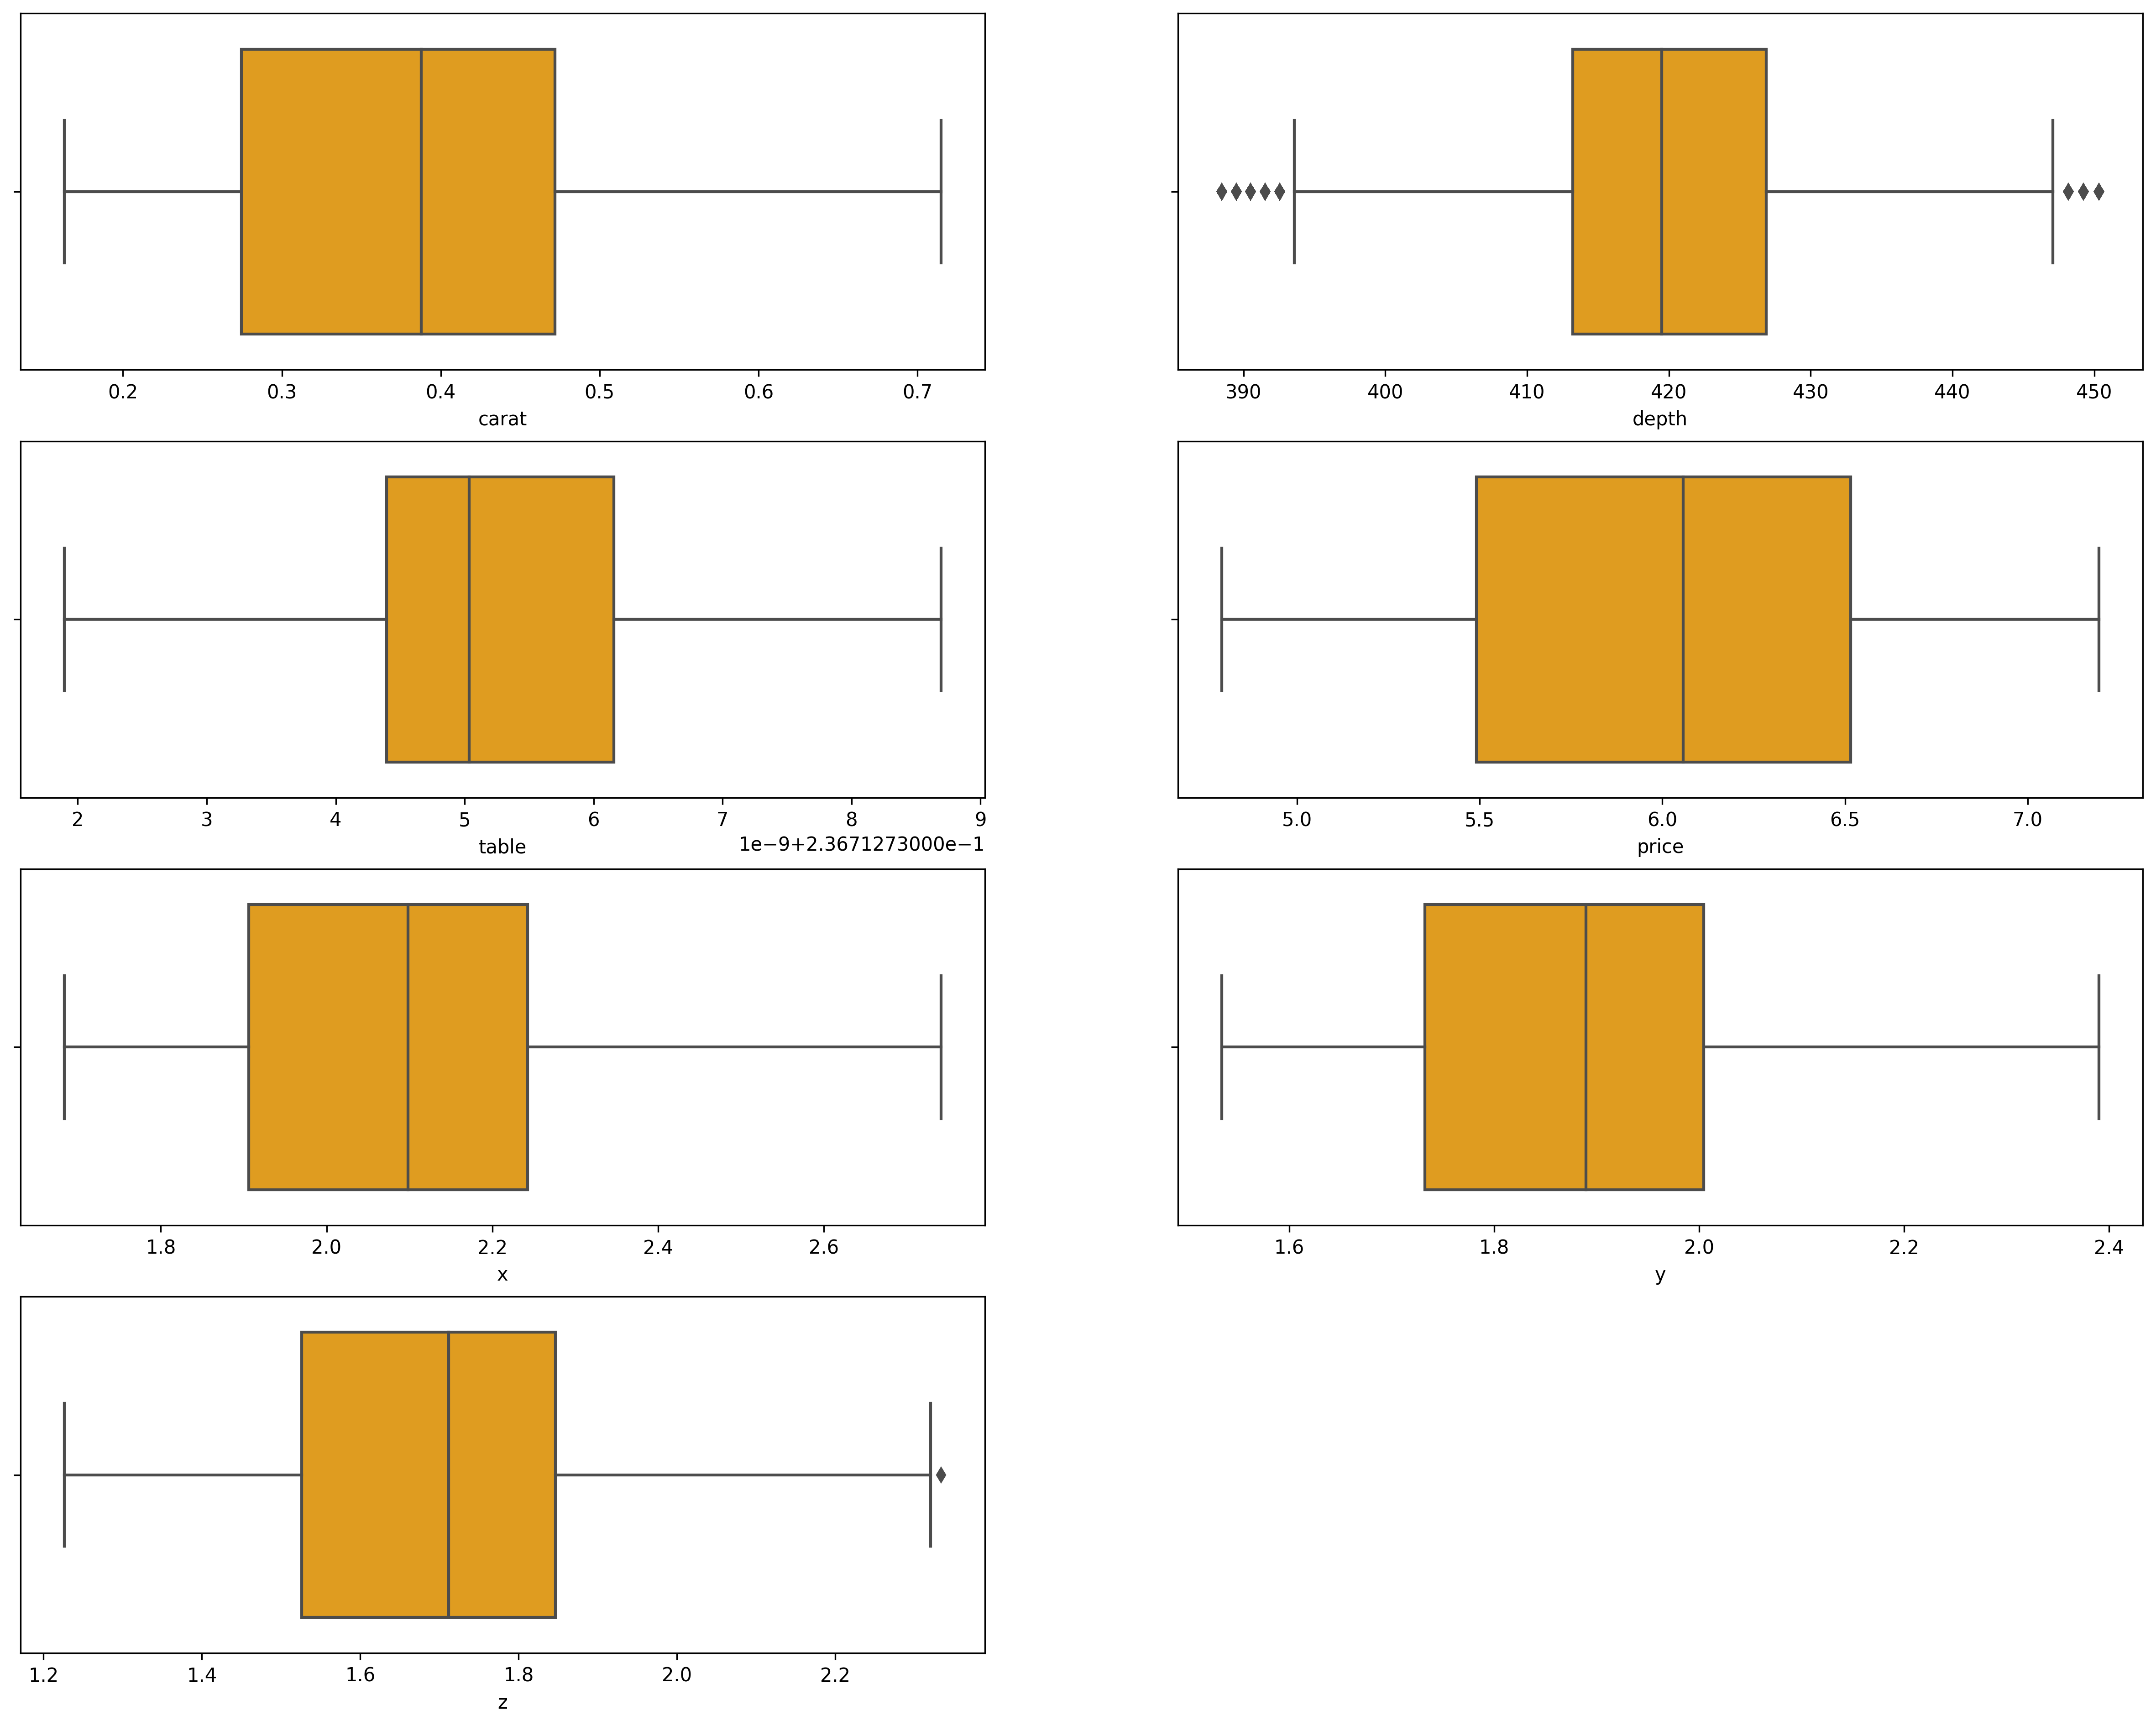

In [39]:
plt.figure(figsize=(20,20), dpi=300)
i=1
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.subplot(5,2,i)
    i+=1
    sns.boxplot(x=df[col], color='orange')

#### Converting Categorial into Numerical

In [40]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.182396,Ideal,E,SI2,416.357223,0.236713,4.793885,1.736710,1.595582,1.364145
1,0.169610,Premium,E,SI1,398.713831,0.236713,4.793885,1.722371,1.567413,1.320793
2,0.182396,Good,E,VS1,419.499357,0.236713,4.795951,1.760264,1.613272,1.320793
3,0.218091,Premium,I,VS2,425.809207,0.236713,4.810232,1.794822,1.643954,1.433652
4,0.229174,Good,J,SI2,435.337671,0.236713,4.812246,1.826278,1.666352,1.473830


In [41]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [42]:
top_features = df['cut'].value_counts()[:-1]
for feature in top_features.index:
    df[feature] = np.where(df['cut']==feature,1,0)

In [43]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [44]:
top_features = df['color'].value_counts()[:-1]
for feature in top_features.index:
    df[feature] = np.where(df['color']==feature,1,0)

In [45]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [46]:
top_features = df['clarity'].value_counts()[:-1]
for feature in top_features.index:
    df[feature] = np.where(df['clarity']==feature,1,0)

In [47]:
df.drop(axis=1, inplace=True, columns=['color', 'cut', 'clarity'])

In [48]:
df.head()

,carat,depth,table,price,x,y,z,Ideal,Premium,Very Good,...,H,D,I,SI1,VS2,SI2,VS1,VVS2,VVS1,IF
0,0.182396,416.357223,0.236713,4.793885,1.736710,1.595582,1.364145,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.169610,398.713831,0.236713,4.793885,1.722371,1.567413,1.320793,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.182396,419.499357,0.236713,4.795951,1.760264,1.613272,1.320793,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.218091,425.809207,0.236713,4.810232,1.794822,1.643954,1.433652,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,0.229174,435.337671,0.236713,4.812246,1.826278,1.666352,1.473830,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# X & y

In [82]:
X = df.drop(axis=1, columns=['price'])
y= df.price

# Feature Selection

In [83]:
from sklearn.feature_selection import SelectKBest, chi2

In [84]:
selectKbest = SelectKBest(k='all')

In [85]:
selectKbest.fit(X, y)

SelectKBest(k='all')

In [86]:
pd.Series(data=selectKbest.scores_, index=X.columns)

carat         103.619360
depth           1.187724
table        7974.185846
x              96.949089
y              99.877009
z              85.489540
Ideal           1.522646
Premium         1.491708
Very Good       1.437023
Good            1.199868
G               1.842521
E               1.808605
F               1.833318
H               1.889357
D               1.959780
I               1.885424
SI1             2.195498
VS2             2.200621
SI2             2.500366
VS1             1.763945
VVS2            1.820291
VVS1            1.595439
IF              1.858106
dtype: float64

# Splitting into train and test

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train , x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# MODEL

In [89]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [90]:
xgb = XGBRegressor()
rfc = RandomForestRegressor()

In [91]:
xgb.fit(x_train, y_train)
rfc.fit(x_train, y_train)

RandomForestRegressor()

In [92]:
pred_xgb = xgb.predict(x_test)
pred_rfc = rfc.predict(x_test)

In [93]:
print(f'XGB : {r2_score(pred_xgb, y_test)}')
print(f'RFC : {r2_score(pred_rfc, y_test)}')

XGB : 0.9912740660031898
RFC : 0.9889471515495731


In [94]:
print(f'XGB : {mean_absolute_error(pred_xgb, y_test)}')
print(f'RFC : {mean_absolute_error(pred_rfc, y_test)}')

XGB : 0.040580689027652744
RFC : 0.041555736031699
